## Lane Detection using OpenCV | Computer Vision

__Description : Detection of current lane in which vehicle is moving on road in an image and video using OpenCV.__

__Python libraries used :__
    1. Numpy
    2. Matplotlib
    3. cv2

Import Numpy and cv2 and other required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Import road lane image to detect lanes

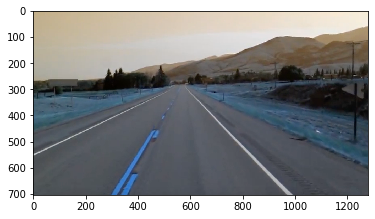

In [175]:
lane_image = cv2.imread('lane3.jpg')
plt.imshow(lane_image)

## Analyzing Image

This image is in BGR format. Convert image into RGB format to load image using matplotlib.

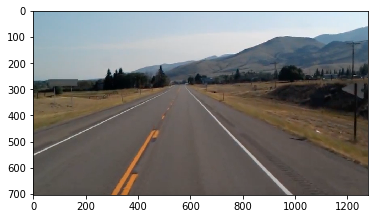

In [176]:
lane = cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB)
plt.imshow(lane)

In [178]:
# Determining Image shape
lane.shape

(704, 1279, 3)

In [179]:
height = lane.shape[0]
width = lane.shape[1]

This image is in RGB format with width = 1279 and height = 704 with 3 channels

## Detecting Lanes

__Detecting Lanes requires 3 steps:__
    1. Find Region of Interest
    2. Find Lane Edges
    3. Draw Lane Lines

### 1. Region of Interest

Determining Vertices of triangle which is Region of Interest.

In [199]:
roi_points = [(0, height), (width/2, height/2), (width, height)]
roi_points

[(0, 704), (639.5, 352.0), (1279, 704)]

This region of interest is the current lane vehicle is moving in. Function below determines region of interest.

In [3]:
def region_of_interest(image, points):
    
    ''' Function to determine Region of Interest.
    This function takes lane image and triangle vertices as input to crop 
    and keep only area inside the trianle and remove other part of image'''
    
    mask = np.zeros_like(image)
    #channel_count = image.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, points, match_mask_color)
    roi_image = cv2.bitwise_and(image, mask)
    return roi_image

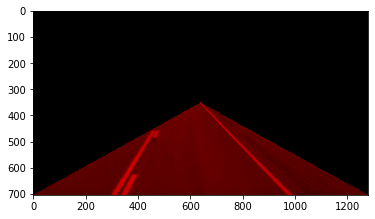

In [195]:
roi_image = region_of_interest(lane, np.array([roi_points], np.int32),)
plt.imshow(roi_image)

This image is masked with the triangle which shows Region of Interest where lanes can be detected.

### 2. Find Lane Edges

Finding Edges requires conversion of image to grayscale image. Convert RGB image to GRAY image.

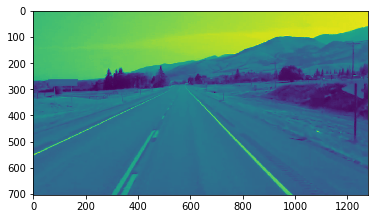

In [206]:
gray_image = cv2.cvtColor(lane, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image)

Use __Canny Edge Detection__ of cv2 on Grayscale image to determine its edges.

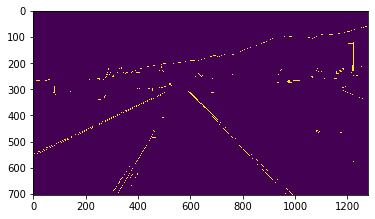

In [207]:
canny_image = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny_image)

Image above has all the outlines but we require only lane lines which is in Region of Interest. Using region of interest method.

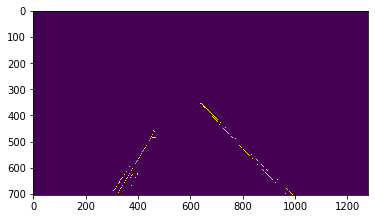

In [208]:
roi_image2 = region_of_interest(canny_image, np.array([roi_points], np.int32),)
plt.imshow(roi_image2)

Lane lines has been detected in the region of interest.

### 3. Draw Lane Lines

Drawing lines on detected lane lines. The function below detects lines on original image.

In [4]:
def draw_lane_lines(image, lines):
    
    '''Function to draw lines on lanes detected.
    This function takes original image and Hough Transformedlines 
    vector and draws those lines on original image using OpenCV.
    '''
        
    copy_image = np.copy(image)
    black_image = np.zeros((copy_image.shape[0], copy_image.shape[1], 3), dtype = np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(black_image, (x1, y1), (x2, y2), (0, 255, 0), thickness = 5)
            
    line_image = cv2.addWeighted(copy_image, 0.8, black_image, 1, 0.0)
    return line_image

__Probabilistic HoughLine Tranform__

Utilizing Probabilistic HoughLine Transform method of cv2 to determine the line vector of all lines detected in the image on Canny Image in Region of Interest.

In [202]:
lines = cv2.HoughLinesP(roi_image2, rho = 6, theta = np.pi/60, threshold = 160, lines = np.array([]),
                       minLineLength = 40, maxLineGap = 25)

In [211]:
# Calling fuction to draw lane lines on original image.
line_image = draw_lane_lines(lane, lines)

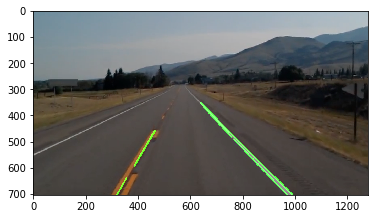

In [212]:
plt.imshow(line_image)

This is final image with lines drawn on lanes detected.

### Function to Detect Lanes

In [9]:
def Detect_Lanes_Video(image):
    
    '''Function to Detect Lanes. This function takes an image as 
    an input and performs all the operations like converting to 
    grayscale image, finding region of interest and drawing lines 
    on detected lanes.'''
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 100, 120)
    
    roi_points = [(0, image.shape[0]), (image.shape[1]/2, image.shape[0]/2), (image.shape[1], image.shape[0])]
    
    roi_image2 = region_of_interest(canny_image, np.array([roi_points], np.int32),)
    lines = cv2.HoughLinesP(roi_image2, rho = 2, theta = np.pi/60, threshold = 50, lines = np.array([]),
                       minLineLength = 40, maxLineGap = 125)
    line_image = draw_lane_lines(image, lines)
    return line_image

In [10]:
cap = cv2.VideoCapture('test2.mp4')
while(cap.isOpened()):
    _,frame = cap.read()
    line_image = Detect_Lanes_Video(frame)
    cv2.imshow('Result', line_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

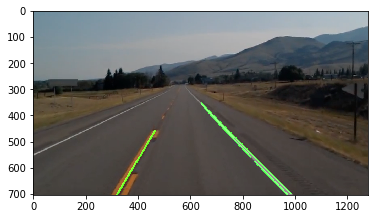

In [319]:
image = cv2.imread('lane3.jpg')
final_image = Detect_Lanes(image)
plt.imshow(final_image)

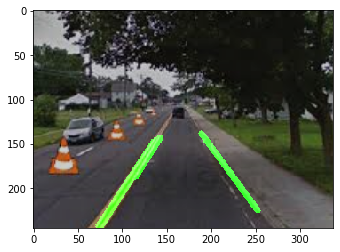

In [341]:
image = cv2.imread('lane1.jpg')
final_image = Detect_Lanes(image)
plt.imshow(final_image)

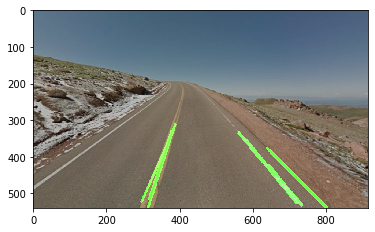

In [340]:
image = cv2.imread('lane11.jpg')
final_image = Detect_Lanes(image)
plt.imshow(final_image)

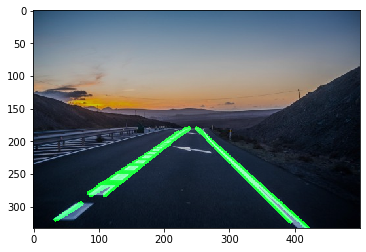

In [348]:
image = cv2.imread('lane5.jpg')
final_image = Detect_Lanes(image)
plt.imshow(final_image)

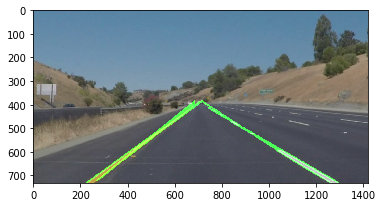

In [339]:
image = cv2.imread('lane7.jpg')
final_image = Detect_Lanes(image)
plt.imshow(final_image)

## Result

Road Lane is detected on couple of images. Next NoteBook contains Lane Detection in a video.